In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from pandas import Series,DataFrame
import seaborn as sns 


In [3]:
#https://www.kaggle.com/residentmario/bivariate-plotting-with-pandas/data
pokemon = pd.read_csv("Pokemon.csv", index_col=0)
pokemon.head()


,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
#,,,,,,,,,,,,
1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


## Multivariate plotting 多变量

- df.plot.scatter()	
- df.plot.box()	
- sns.heatmap 
- pd.plotting.parallel_coordinates

参考
- https://zhuanlan.zhihu.com/p/27683042
- http://seaborn.pydata.org/tutorial/categorical.html#categorical-scatterplots

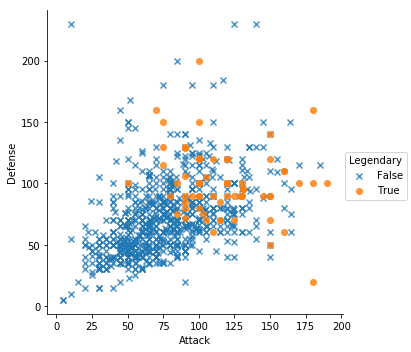

In [17]:
sns.lmplot(x='Attack',y='Defense',hue='Legendary',fit_reg=False,markers=['x','o'],data = pokemon)
plt.show()

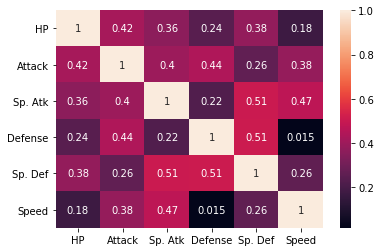

In [22]:
sns.heatmap(
    pokemon.loc[:, ['HP', 'Attack', 'Sp. Atk', 'Defense', 'Sp. Def', 'Speed']].corr(),
    annot=True
)
plt.show()

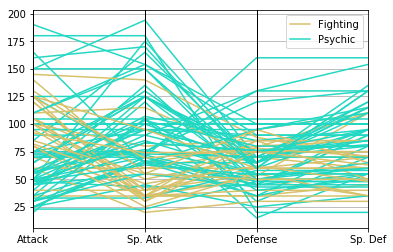

In [23]:
import pandas as pd
from pandas.plotting import parallel_coordinates

p = (pokemon[(pokemon['Type 1'].isin(["Psychic", "Fighting"]))]
         .loc[:, ['Type 1', 'Attack', 'Sp. Atk', 'Defense', 'Sp. Def']]
    )

parallel_coordinates(p, 'Type 1')
plt.show()

### 非常实用的方法是将Seaborn的分类图分为三类，将分类变量每个级别的每个观察结果显示出来，显示每个观察分布的抽象表示，以及应用统计估计显示的权重趋势和置信区间：

- 第一个包括函数swarmplot()和stripplot()
- 第二个包括函数boxplot()和violinplot()
- 第三个包括函数barplot()和pointplt()

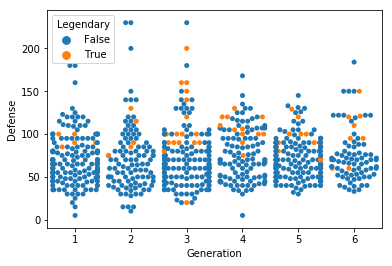

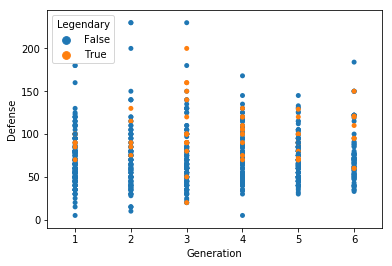

In [8]:
sns.swarmplot(x='Generation',y='Defense',hue='Legendary',data = pokemon)
plt.show()
sns.stripplot(x='Generation',y='Defense',hue='Legendary',data = pokemon)
plt.show()

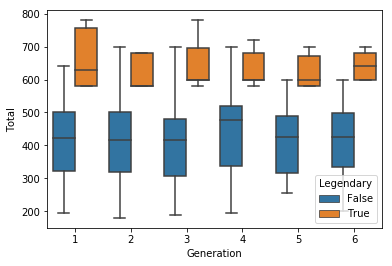

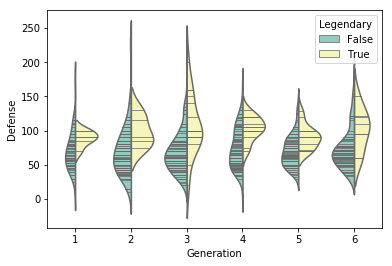

In [9]:
sns.boxplot(x="Generation", y="Total", hue='Legendary', data=pokemon)
plt.show()
sns.violinplot(x='Generation',y='Defense',hue='Legendary',data = pokemon,
               split=True, inner="stick", palette="Set3");
plt.show()

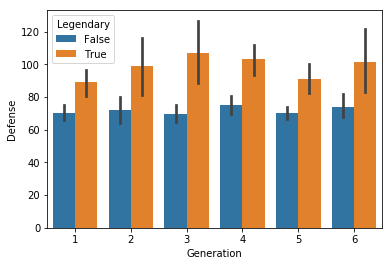

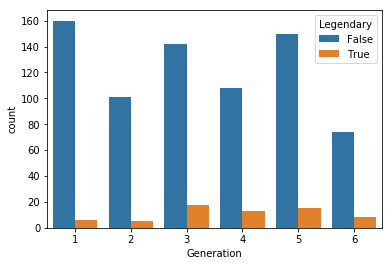

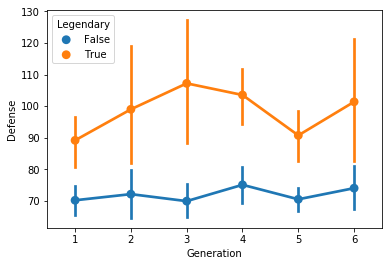

In [24]:
sns.barplot(x="Generation", y="Defense", hue="Legendary", data=pokemon)
plt.show()
sns.countplot(x="Generation",hue="Legendary", data=pokemon )
plt.show()
sns.pointplot(x="Generation", y="Defense", hue="Legendary", data=pokemon)
plt.show()

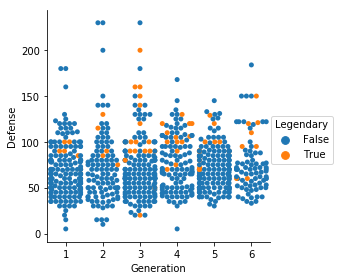

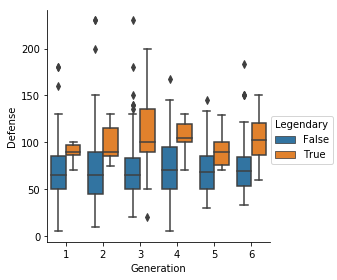

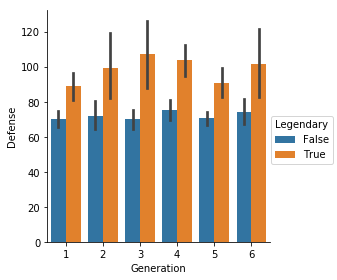

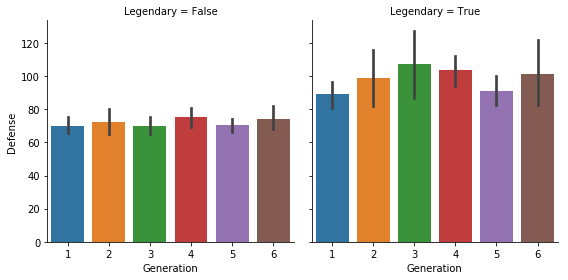

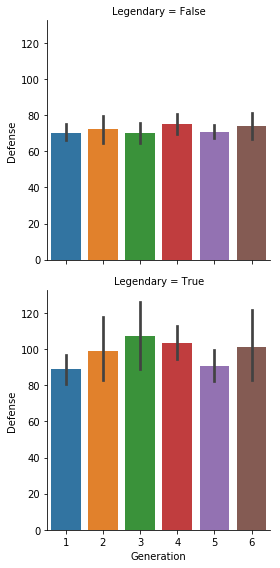

In [29]:
# sns.swarmplot(x='Generation',y='Defense',hue='Legendary',data = pokemon)
sns.factorplot(x="Generation", y="Defense", hue="Legendary", data=pokemon, kind="swarm");
sns.factorplot(x="Generation", y="Defense", hue="Legendary",data=pokemon, kind="box")
sns.factorplot(x="Generation", y="Defense", hue="Legendary",data=pokemon, kind="bar")
sns.factorplot(x="Generation", y="Defense", col="Legendary", data=pokemon, kind="bar")
sns.factorplot(x="Generation", y="Defense", row="Legendary", data=pokemon, kind="bar")
# hue row,col 三个关系
#sns.factorplot(x="Generation", y="Defense", hue="Legendary", col="time", data=pokemon, kind="bar")
plt.show()

## 1. Facet Grid  2 .	Pair Plot

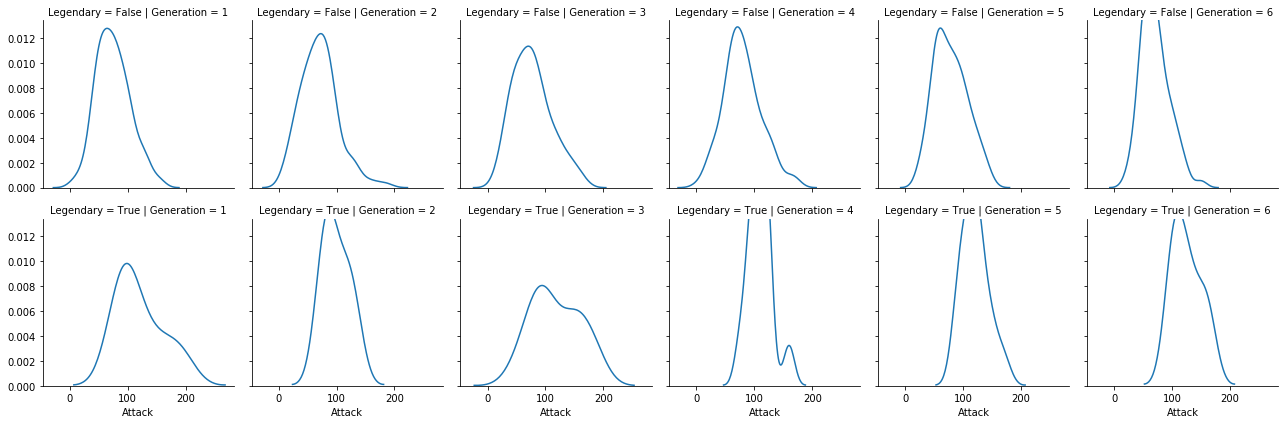

In [27]:
g = sns.FacetGrid(pokemon, col ="Generation", row="Legendary")
g.map(sns.kdeplot, "Attack")
plt.show()

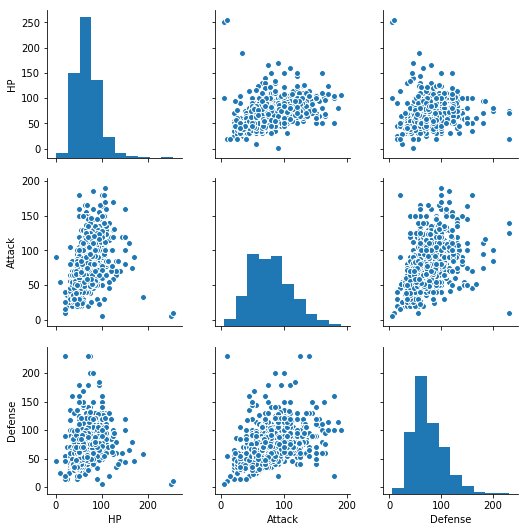

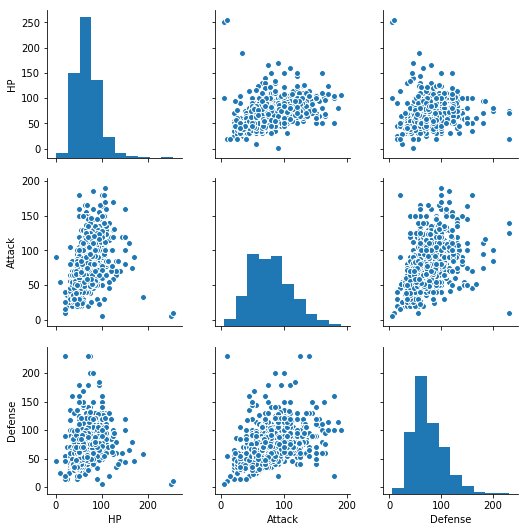

In [31]:
sns.pairplot(pokemon[['HP', 'Attack', 'Defense']])
plt.show()

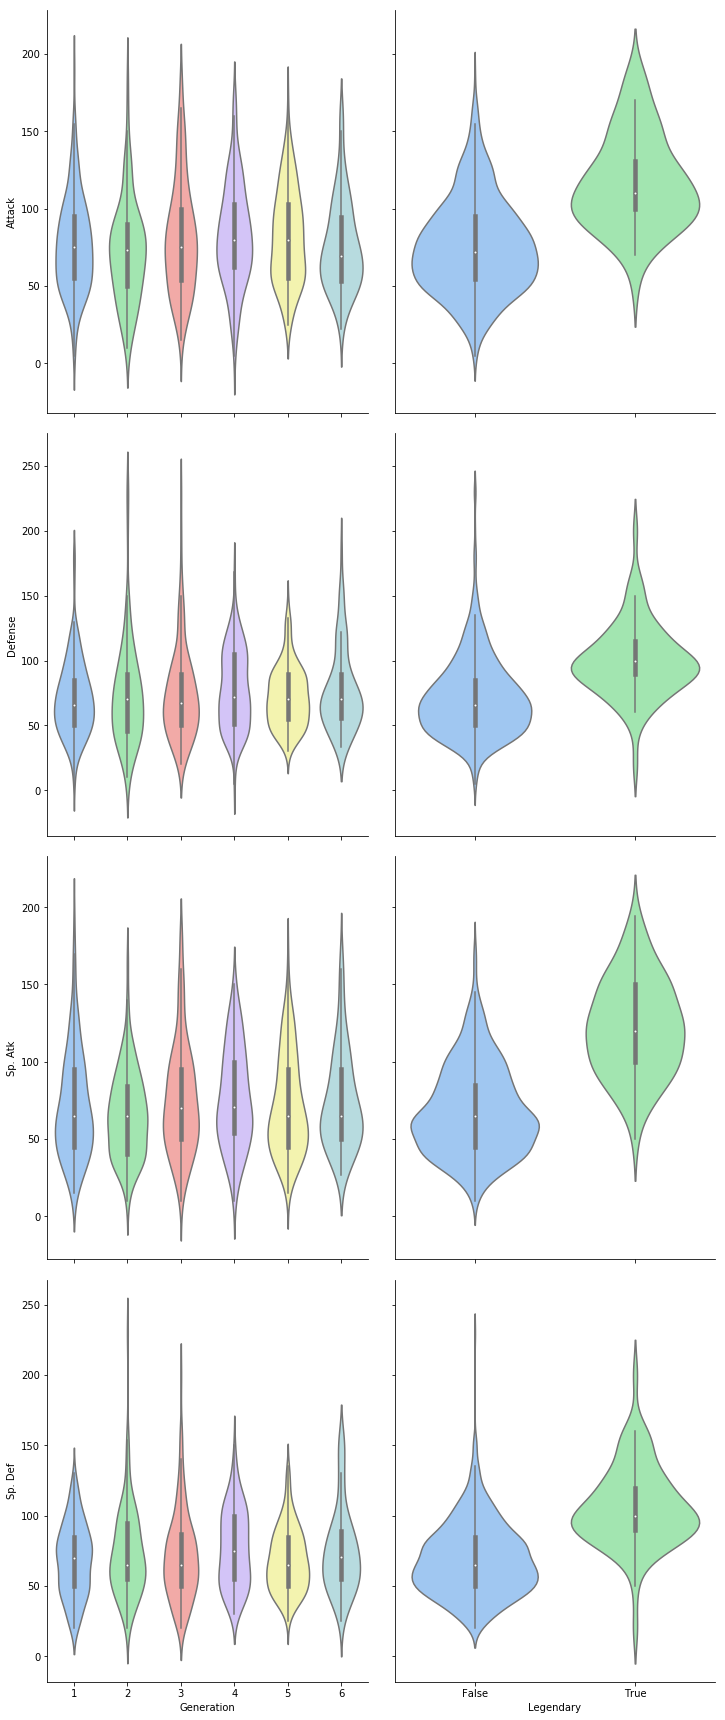

In [20]:

g = sns.PairGrid(pokemon,
                 x_vars=["Generation","Legendary"],
                 y_vars=["Attack","Defense","Sp. Atk",  "Sp. Def"],
                 aspect=.85, size=6)
g.map(sns.violinplot,palette="pastel")
plt.show()

## Faceting 
